## Lab 1: Neural networks
Student Name: Duong Van Hiep

Class: AI1811

Student ID: HE18115

## Contents
 Load the data and create train-test splits

- Exercise 1: Preprocessing

- Exercise 2: Create a deep neural net model

- Exercise 3: Create a training function

- Exercise 4: Evaluate the model

- Exercise 5: Optimize the model

 **In this lab we will build dense neural networks on the MNIST dataset**.

##  Load the data and create train-test splits

In [1]:
# Import library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
import tensorflow as tf  

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize data
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [3]:
# Download MNIST data. Takes a while the first time.
mnist = oml.datasets.get_dataset(554)
X, y, _, _ = mnist.get_data(target=mnist.default_target_attribute, dataset_format="array")
X = X.reshape(70000, 28, 28)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8612\569784116.py:3: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, _ = mnist.get_data(target=mnist.default_target_attribute, dataset_format="array")


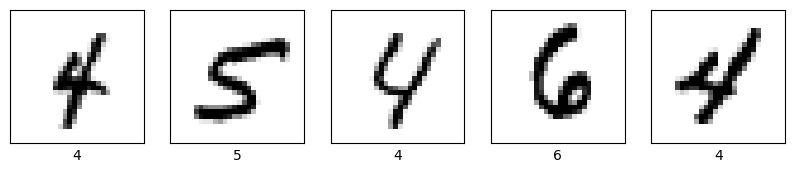

In [4]:
# Take some random examples
from random import randint
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    n = randint(0, 70000)
    axes[i].imshow(X[n], cmap=plt.cm.gray_r)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel("{}".format(y[n]))
plt.show()

In [5]:
# Use `dataset_format='dataframe'` instead of 'array' to future-proof the code
mnist = oml.datasets.get_dataset(554)
X, y, _, _ = mnist.get_data(target=mnist.default_target_attribute, dataset_format="dataframe")

# ## Split the Dataset
# For MNIST, there exists a predefined stratified train-test split of 60000 training samples and 10000 test samples.
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, stratify=y)

## Exercise 1: Preprocessing
- Normalize the data: map each feature value from its current representation (an integer between 0 and 255) to a floating-point value between 0 and 1.0.

- Store the floating-point values in x_train_normalized and x_test_normalized

- Map the class label to a on-hot-encoded value. Store in y_train_encoded and y_test_encoded 

In [6]:
# Chuẩn hóa về khoảng 0–1
x_train_normalized = X_train.astype("float32") / 255.0
x_test_normalized = X_test.astype("float32") / 255.0

# Mã hóa one-hot cho train và test
y_train_encoded = tf.keras.utils.to_categorical(y_train, 10)
y_test_encoded = tf.keras.utils.to_categorical(y_test, 10)

# print shape
print(f"x_train_normalized shape: {x_train_normalized.shape}")
print(f"x_test_normalized shape: {x_test_normalized.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")

x_train_normalized shape: (60000, 784)
x_test_normalized shape: (10000, 784)
y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


##  Exercise 2: Create a deep neural net model
 Implement a create_model function which defines the topography of the deep neural net, specifying the following:
- The number of layers in the deep neural net: Use 2 dense layers for now.
- The number of nodes in each layer: these are parameters of your function.
- Any regularization layers. Add at least one dropout layer.
- The optimizer and learning rate. Make the learning rate a parameter of your function as well.

In [7]:
def create_model(layer_1_units=32, layer_2_units=10, learning_rate=0.001, dropout_rate=0.2):

    print(f"Creating a model with the following configuration:")
    print(f" - Layer 1 units: {layer_1_units}")
    print(f" - Layer 2 units: {layer_2_units}")
    print(f" - Learning rate: {learning_rate}")
    print(f" - Dropout rate: {dropout_rate}")
    
    # Initialize the model
    model = tf.keras.Sequential([
        # Lớp dense đầu tiên
        tf.keras.layers.Dense(layer_1_units, activation="relu", input_shape=(784,)),
        tf.keras.layers.Dropout(dropout_rate),  # Dropout for regularization
        # Lớp dense thứ hai
        tf.keras.layers.Dense(layer_2_units, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),  # Dropout for regularization
        # Lớp đầu ra với 10 đơn vị 
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    
    # Print a summary of the model
    print("\nModel Summary:")
    model.summary()
    
    return model


In [8]:
model = create_model(layer_1_units=64, layer_2_units=32, learning_rate=0.003, dropout_rate=0.3)
model.summary() 

Creating a model with the following configuration:
 - Layer 1 units: 64
 - Layer 2 units: 32
 - Learning rate: 0.003
 - Dropout rate: 0.3

Model Summary:


d:\Setup\New folder\envs\cpv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

## Exercise 3: Create a Training Function. 
 Implement a train_model function which trains and evaluates a given model. It should do a train-validation split and report the train and validation loss and accuracy, and return the training history.

In [9]:
def train_model(model, X, y, validation_split=0.1, epochs=10, batch_size=None):
    """
        model: the model to train.
        X, y: the training data and labels.
        validation_split: the percentage of data set aside for validation.
        epochs: the number of epochs to train for.
        batch_size: the batch size for minibatch SGD.
    """
   
    print(f"Training configuration:")
    print(f" - Validation split: {validation_split}")
    print(f" - Epochs: {epochs}")
    print(f" - Batch size: {batch_size}")
    
    # Train the model
    history = model.fit(
        X, y,
        validation_split=validation_split,
        epochs=epochs,
        batch_size=batch_size,
        verbose=1 
    )

    # Trả về training history
    return history


In [10]:
# Assume `model` has been created using `create_model` and data has been preprocessed.
history = train_model(model, x_train_normalized, y_train_encoded, validation_split=0.2, epochs=20, batch_size=64)


Training configuration:
 - Validation split: 0.2
 - Epochs: 20
 - Batch size: 64
Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7407 - loss: 0.8170 - val_accuracy: 0.9344 - val_loss: 0.2133
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9048 - loss: 0.3310 - val_accuracy: 0.9502 - val_loss: 0.1760
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9170 - loss: 0.2836 - val_accuracy: 0.9546 - val_loss: 0.1528
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9269 - loss: 0.2525 - val_accuracy: 0.9550 - val_loss: 0.1560
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9299 - loss: 0.2434 - val_accuracy: 0.9555 - val_loss: 0.1552
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9330 - loss: 0.2317 - val_accuracy: 0.9575 - val_loss: 0.1422
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9361 - loss: 0.2226 - val_accuracy: 0.9568 - val_loss: 0.1554
Epoch 8/20
750/750 ━━━━

##  Exercise 4: Evaluate the model
- Train the model with a learning rate of 0.003, 50 epochs, batch size 4000, and a validation set that is 20% of the total training data. Use default settings otherwise. Plot the learning curve of the loss, validation loss, accuracy, and validation accuracy. Finally, report the performance on the test set.
 - Feel free to use the plotting function below, or implement the callback from the tutorial to see results in real time.

In [11]:
def plot_curve(history, list_of_metrics):
    """
    Plot the learning curves for the given metrics.

    Args:
        history: the history object returned by the fit function.
        list_of_metrics: the metrics to plot (e.g., 'loss', 'accuracy', etc.).
    """
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m, lw=2)  # Skip the first epoch
    plt.legend()

Training configuration:
 - Validation split: 0.2
 - Epochs: 50
 - Batch size: 4000
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9506 - loss: 0.1626 - val_accuracy: 0.9638 - val_loss: 0.1296
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9494 - loss: 0.1623 - val_accuracy: 0.9652 - val_loss: 0.1271
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9539 - loss: 0.1486 - val_accuracy: 0.9653 - val_loss: 0.1251
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9559 - loss: 0.1480 - val_accuracy: 0.9655 - val_loss: 0.1242
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9582 - loss: 0.1445 - val_accuracy: 0.9659 - val_loss: 0.1234
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9578 - loss: 0.1389 - val_accuracy: 0.9659 - val_loss: 0.1235
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9589 - loss: 0.1355 - val_accuracy: 0.9660 - val_loss: 0.1235
Epoch 8/50
12/12 ━━━━━━━━━━━

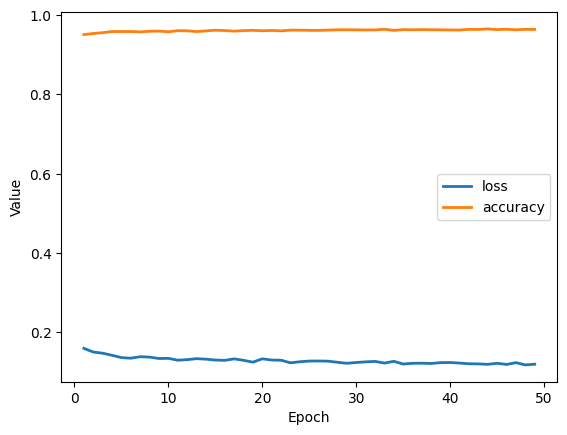

In [12]:
# Train model
history = train_model(
    model,
    x_train_normalized,
    y_train_encoded,
    validation_split=0.2,
    epochs=50,
    batch_size=4000
)

# Plot learning curves
plot_curve(history, ["loss", "accuracy"])

##  Exercise 5: Optimize the model

In [13]:
def create_adam_optimized_model(layer_units=[128, 64, 32], learning_rate=0.001, dropout_rate=0.3):
    """
    Create a neural network model optimized using the Adam optimizer.

    Args:
        layer_units: List of integers specifying the number of nodes in each dense layer.
        learning_rate: Learning rate for the Adam optimizer.
        dropout_rate: Dropout rate for regularization.

    Returns:
        Compiled model.
    """
    print(f"Creating an Adam-optimized model with the following configuration:")
    print(f" - Hidden layers: {len(layer_units)}")
    print(f" - Units in each layer: {layer_units}")
    print(f" - Learning rate: {learning_rate}")
    print(f" - Dropout rate: {dropout_rate}")

    model = tf.keras.Sequential()
    for i, units in enumerate(layer_units):
        # Add dense and dropout layers
        if i == 0:
            model.add(tf.keras.layers.Dense(units, activation="relu", input_shape=(784,)))
        else:
            model.add(tf.keras.layers.Dense(units, activation="relu"))
        model.add(tf.keras.layers.Dropout(dropout_rate))

    # Add output layer
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    # Compile the model with the Adam optimizer
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    model.summary()
    return model




Creating an Adam-optimized model with the following configuration:
 - Hidden layers: 3
 - Units in each layer: [128, 64, 32]
 - Learning rate: 0.001
 - Dropout rate: 0.3


d:\Setup\New folder\envs\cpv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

Training configuration:
 - Validation split: 0.2
 - Epochs: 50
 - Batch size: 128
Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5878 - loss: 1.2284 - val_accuracy: 0.9302 - val_loss: 0.2363
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8995 - loss: 0.3699 - val_accuracy: 0.9488 - val_loss: 0.1728
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9210 - loss: 0.2895 - val_accuracy: 0.9557 - val_loss: 0.1509
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9372 - loss: 0.2348 - val_accuracy: 0.9637 - val_loss: 0.1281
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9441 - loss: 0.2084 - val_accuracy: 0.9642 - val_loss: 0.1271
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9521 - loss: 0.1870 - val_accuracy: 0.9667 - val_loss: 0.1153
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9537 - loss: 0.1703 - val_accuracy: 0.9703 - val_loss: 0.1051
Epoch 8/50
375/375 ━━━

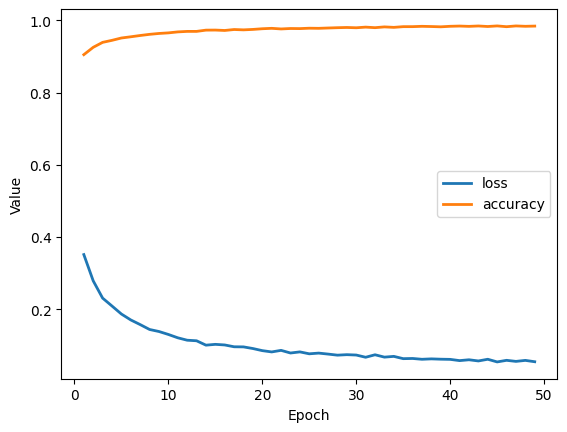

In [14]:
# Train the optimized model
adam_model = create_adam_optimized_model(
    layer_units=[128, 64, 32],  # Hidden layers with respective units
    learning_rate=0.001,        # Learning rate for Adam optimizer
    dropout_rate=0.3            # Dropout rate
)

# Train the model
adam_history = train_model(
    adam_model,
    x_train_normalized,
    y_train_encoded,
    validation_split=0.2,
    epochs=50,  # Number of epochs for training
    batch_size=128  # Batch size
)

# Plot learning curves
plot_curve(adam_history, ["loss", "accuracy"])

# Evaluate the model on the test set
test_loss, test_accuracy = adam_model.evaluate(x_test_normalized, y_test_encoded, verbose=1)
print(f"\nOptimized Adam Model Test Loss: {test_loss:.4f}")
print(f"Optimized Adam Model Test Accuracy: {test_accuracy:.4f}")
